## Using Simulated Annealing for the backward step in LSM American Option pricing 

(instead of regression with LSM)

## Algorithm

```
function SimulatedAnnealing(problem)
    current = initial state
    t = 1
    loop
        T = coolDown(t) // t -> T
        if T < Epsilon then return current
        next = random successor of current
        dE = next.Value - current.Value
        if dE > = then current=next
        else current=next with prob e^-dE/T
        t = t+1

```

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

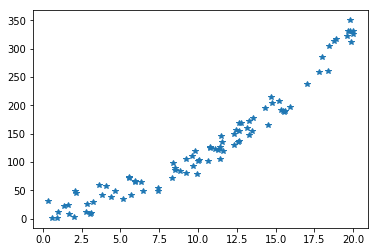

In [266]:
## Make Test Sample
np.random.seed(450000) # seed for Python RNG
def f(x):
    return 3/4 *x*x + 2/5 * x - 2/7

X = 20* np.random.random_sample((90,))

Y = f(X)
Y = Y  +np.random.random_sample((len(X),))*50

plt.plot(X,Y,'*')


In [267]:
reg = np.polyfit(X, Y, 2)
ry = np.polyval(reg, X)
print(reg)
print(ry)

[  0.711479     1.40377747  18.58307927]
[ 127.27478856  220.66709287  127.69498266  143.70901843   34.50076391
  189.04980366   48.48264277  284.4661612   150.49610528   24.63130808
   38.34036545   68.27205873   92.56190228  159.96138628  163.10991258
  324.30489034  166.21709356  104.15040802  100.41682419   27.87642168
   24.38250304  268.02055391   52.03317598  150.47248271   98.60622567
  192.86241309   19.19020721  248.68866766   91.81180036  285.60477199
   56.99186426  273.95156804  162.42508002   21.88348295   19.72334321
  116.34279738   20.71579004  146.57702889   80.55459964  319.95925576
  121.20459557  330.34551615  116.20862259  129.15408295  211.42430782
   67.86712345   30.61332808  320.91105191  298.78303037   36.25941316
   20.49204568  207.71694611  204.86264333  184.66832926   56.29531319
  194.86022328  152.70426351   29.83985141  212.10703166   97.87332913
   24.8643776   168.53042259  105.08184267   22.94812434  326.35917837
  148.43869493  143.84743081  125.44

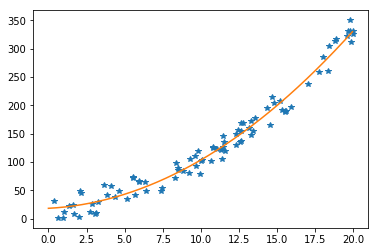

In [268]:
X_ = np.arange(0,20,0.05)
Y_ = reg[0]*X_*X_+reg[1]*X_+reg[2]
plt.plot(X,Y,'*')
plt.plot(X_,Y_)

In [257]:
def coolDown(TS,t):
    return TS*np.exp(-t/1E4)

In [264]:
def random_successor(c,T):
    # Variance of parameter Space
    p = np.random.randn(3)*0.4
    c = c + c*p
    return c

In [259]:
def chi2err(par,X,Y):
    N = len(X)
    s = 0
    for i in range(N):
        tmp = par[0]*X[i]*X[i]+par[1]*X[i]+par[2]-Y[i]
        s += tmp*tmp
    return s/N


[  9.11676661e-01   4.86503090e-06   3.94684476e-01]
506.023393339
[  0.82261748   0.88416593  19.68192733]
[  0.74109029   1.17124758  28.04964694]
[  0.67428934   1.18388449  24.01452189]
[ 0.74629953  1.44743538  9.93034348]
[ 0.5547011   4.90118814  3.03787885]
[  0.79464407   0.21421351  21.89518579]
[  0.78140689   0.32743398  18.66420448]
[  7.86912780e-01  -6.04673331e-07   2.39077095e+01]
[  7.89152326e-01  -1.38138842e-09   2.30699609e+01]
[  7.88528427e-01  -1.84387198e-09   2.32688291e+01]
[  7.65197430e-01   1.31278412e-14   2.51432426e+01]
[  7.80755706e-01   2.48350218e-17   2.30461176e+01]
[  7.80624661e-01   8.46860341e-19   2.34367054e+01]
[  7.77655040e-01  -1.22588013e-25   2.43397413e+01]
[  7.76512187e-01  -1.21153344e-27   2.45380425e+01]
[  7.73829629e-01  -1.10902648e-28   2.42471497e+01]
[  7.74681605e-01  -2.70005909e-42   2.42975958e+01]
[  7.74874387e-01   6.88824586e-49   2.43076297e+01]
[  7.74874387e-01   6.88824586e-49   2.43076297e+01]
212.890111095


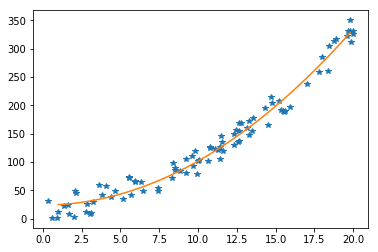

In [271]:
## SA start with regression parameters
T_Start = 1E2
epsilon = 1E-5
start = np.polyfit(X, Y, 2)
qual = chi2err(current,X,Y)
print(current)
print(chi2err(current,X,Y))

def siman(T_S,epsilon,current,qual):
    t = 1
    dE =1000
    while(True):
        T = coolDown(T_S,t)
        if (T < epsilon):
            return current,dE
        
        nextV = random_successor(current,T)
        #print(nextV)
        dE = qual-chi2err(nextV,X,Y)
        #print(dE)
        if dE > 0:
            current = nextV
            qual = chi2err(current,X,Y)
            print(current)
        else:
            if np.exp(dE/T) > np.random.rand():
                current = nextV      
        t = t + 1
    
current,dE = siman(T_Start,epsilon,start,qual)    
print(current)
print(chi2err(current,X,Y))

X_sim = np.arange(1,20,0.2)
Y_sim = current[0] * X_sim * X_sim + current[1] * X_sim + current[2]
plt.plot(X,Y,"*")
plt.plot(X_sim,Y_sim)


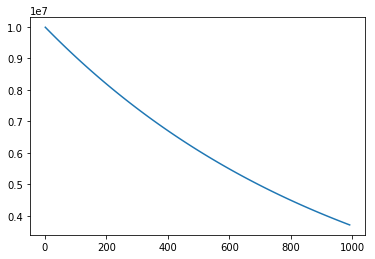

In [73]:
X_ = np.arange(1,1000,10)
Y_ = coolDown(X_)
plt.plot(X_,Y_)


In [78]:
p = np.random.randn(3)*0.2
X_

array([ 0.17867878, -0.53369271, -0.13634506])

0.99990000499983334